
# Project: TMDB  Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.
> -Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.
> -There are some odd characters
in the ‘cast’ column. Don’t worry
about cleaning them. You can
leave them as is.
> -The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time.

>- <a href="#quest1">Which genres are most popular from year to year?</a>
>- <a href="#quest1">What kinds of properties are associated with movies that have high revenues?</a>


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties
<br />-Load tmdb movies Data Set
<br />-Find Null Value in Data
<br />-Find Dublicate row

In [2]:
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df[(df.budget_adj==0) & (df.revenue_adj==0) ].shape

(4701, 21)

In [6]:
df[(df.budget_adj==0) & (df.revenue_adj==0)& (df.revenue==0)& (df.budget==0) ].shape

(4701, 21)

In [7]:
df[  df.imdb_id.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.000000e+00,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.000000e+00,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.000000e+00,0.0
2090,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,3.000000e+07,967000.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.000000e+00,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,...,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.000000e+00,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,NaN,NaN,...,Florence Foresti is offered Bercy tribute to a...,120,Comedy,TF1 VidÃ©o,9/23/12,15,6.4,2012,0.000000e+00,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,https://www.kickstarter.com/projects/colinandc...,Connor McGuire|Colin McGuire,The Cake is a Lie,...,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,NaN,10/8/13,11,7.5,2013,4.680167e+02,0.0
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"A year later, Aaron is still traveling around ...",80,Action|Adventure|Drama|Fantasy|Family,NaN,1/1/07,11,7.3,2007,0.000000e+00,0.0
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"Aaron and Azazel defeat the Powers, and force ...",80,Adventure|Fantasy|Drama|Action|Science Fiction,NaN,1/1/07,13,7.0,2007,0.000000e+00,0.0


In [8]:
df[  df.id.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


### Data Cleaning 

<br />
-remove un nessary column no need in analysis


In [9]:
df.drop(['cast','homepage','director','tagline','keywords','production_companies','imdb_id','overview'],axis=1,inplace=True)

#### Test

In [10]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

#### Fix null value in genres 

In [11]:


df['genres'].fillna('None',inplace=True)

#### Test

In [12]:
 pd.isnull(df).sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

#### Remove Duplicate Row

In [13]:
df.drop_duplicates(keep='last',inplace=True)

In [14]:
df[  df.duplicated()]

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


#### Fix zero value in revenue

In [15]:
df['revenue_adj']=df['revenue_adj'].replace(0,df['revenue_adj'].mean())

In [16]:
df['budget_adj']=df['budget_adj'].replace(0,df['budget_adj'].mean())

In [17]:
df['budget']=df['budget'].replace(0,df['budget'].mean())

In [18]:
df['revenue']=df['revenue'].replace(0,df['revenue'].mean())

#### Test

In [19]:
df.shape

(10865, 13)

In [20]:
df.to_csv('tmdb-movies-clean.csv',index=False)

<a id='eda'></a>
## Exploratory Data Analysis


<a id='quest1'></a>
###  Which genres are most popular from year to year?

In [21]:
#from https://gist.github.com/jlln/338b4b0b55bd6984f883
def split_data_frame_list(df, 
                       target_column,
                      output_type=float):
    ''' 
    Accepts a column with multiple types and splits list variables to several rows.

    df: dataframe to split
    target_column: the column containing the values to split
    output_type: type of all outputs
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    row_accumulator = []
    def split_list_to_rows(row):
        split_row = row[target_column]
        if isinstance(split_row, list):
          for s in split_row:
              new_row = row.to_dict()
              new_row[target_column] = s
              row_accumulator.append(new_row)
          if split_row == []:
              new_row = row.to_dict()
              new_row[target_column] = None
              row_accumulator.append(new_row)
        else:
          new_row = row.to_dict()
          new_row[target_column] = split_row
          row_accumulator.append(new_row)
    df.apply(split_list_to_rows, axis=1)
    new_df = pd.DataFrame(row_accumulator)
    return new_df

In [22]:
df_genes=df[['genres','release_year','popularity']].copy()
df_genes['genres']=df_genes['genres'].str.split('|')

In [23]:
new_genes=split_data_frame_list(df_genes, target_column='genres')

In [24]:
new_genes.genres.value_counts().index

Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Horror',
       'Adventure', 'Crime', 'Family', 'Science Fiction', 'Fantasy', 'Mystery',
       'Animation', 'Documentary', 'Music', 'History', 'War', 'Foreign',
       'TV Movie', 'Western', 'None'],
      dtype='object')

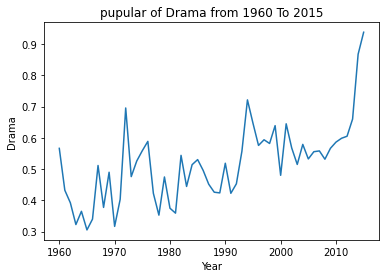

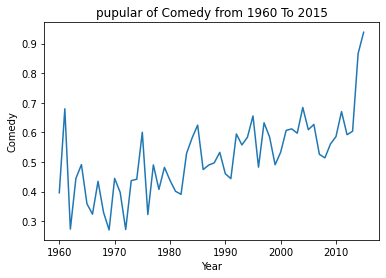

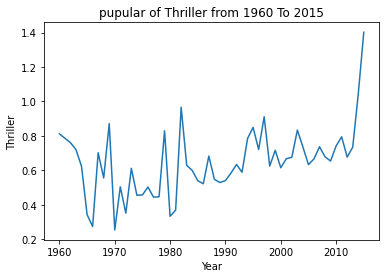

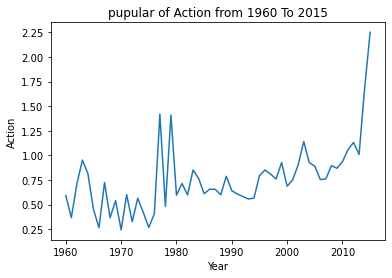

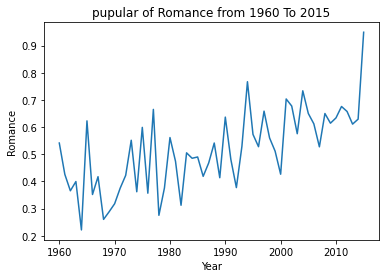

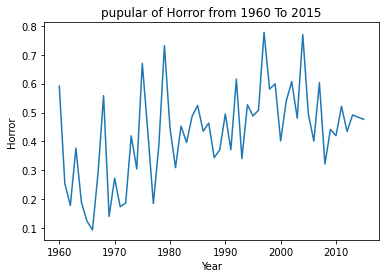

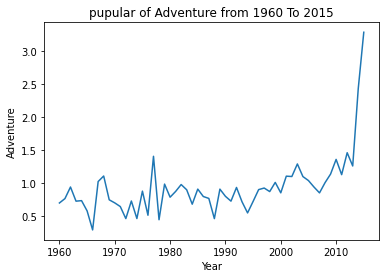

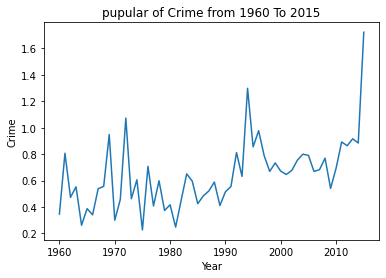

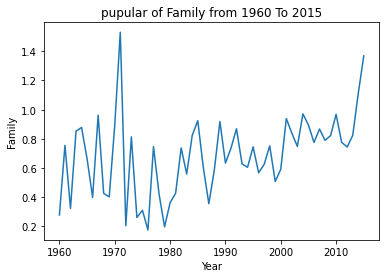

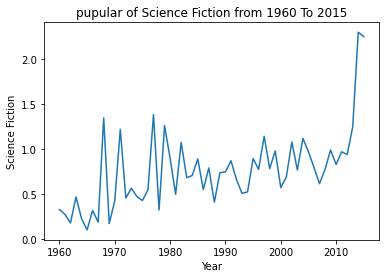

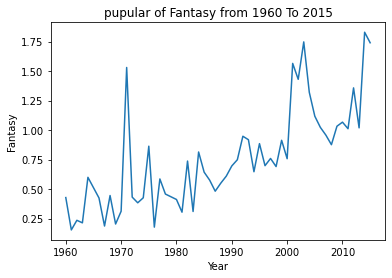

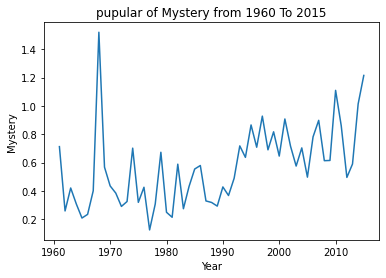

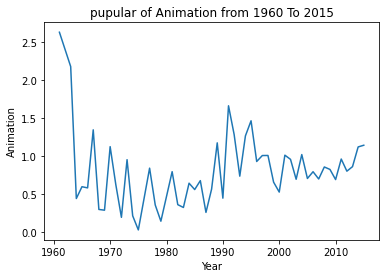

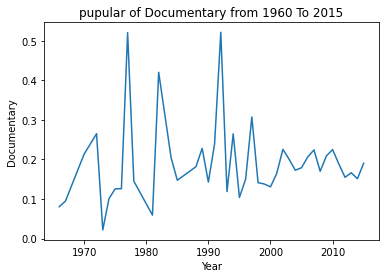

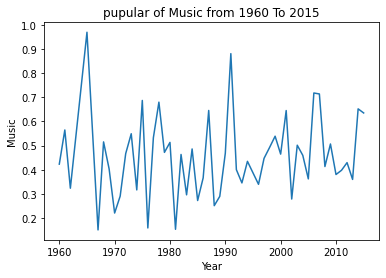

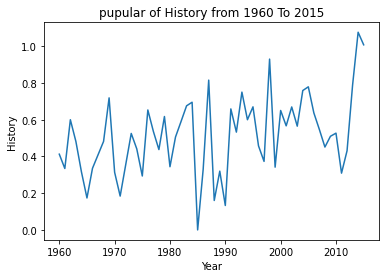

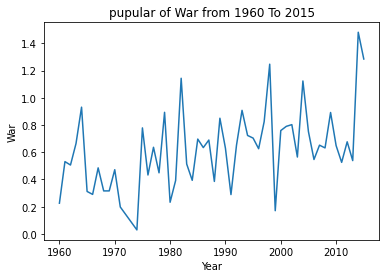

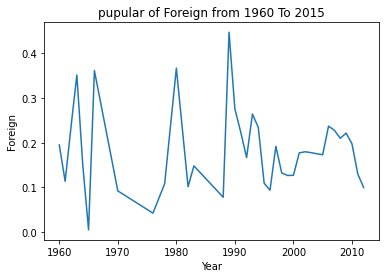

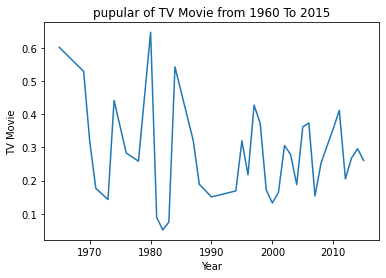

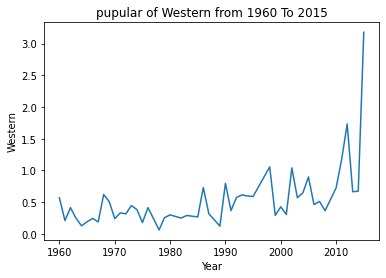

In [25]:
generes=['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Horror',
       'Adventure', 'Crime', 'Family', 'Science Fiction', 'Fantasy', 'Mystery',
       'Animation', 'Documentary', 'Music', 'History', 'War', 'Foreign',
       'TV Movie', 'Western']
def show_plot_generes(generes):
    g_data=new_genes[new_genes['genres']==generes].groupby(['release_year'],as_index=False)['popularity'].mean()
    ax=sns.lineplot(data=g_data, x="release_year", y="popularity")
    ax.set_title('pupular of {} from 1960 To 2015'.format(generes.replace('_',' ')))
    ax.set(xlabel='Year', ylabel=generes)
    plt.show()

for item in generes:
    show_plot_generes(item)



### On the development of the popularity of films over the years from 1960 to 2015 from the ups and downs and the clarification of the general trend for each genre separately.

Text(0, 0.5, 'popular of Geners')

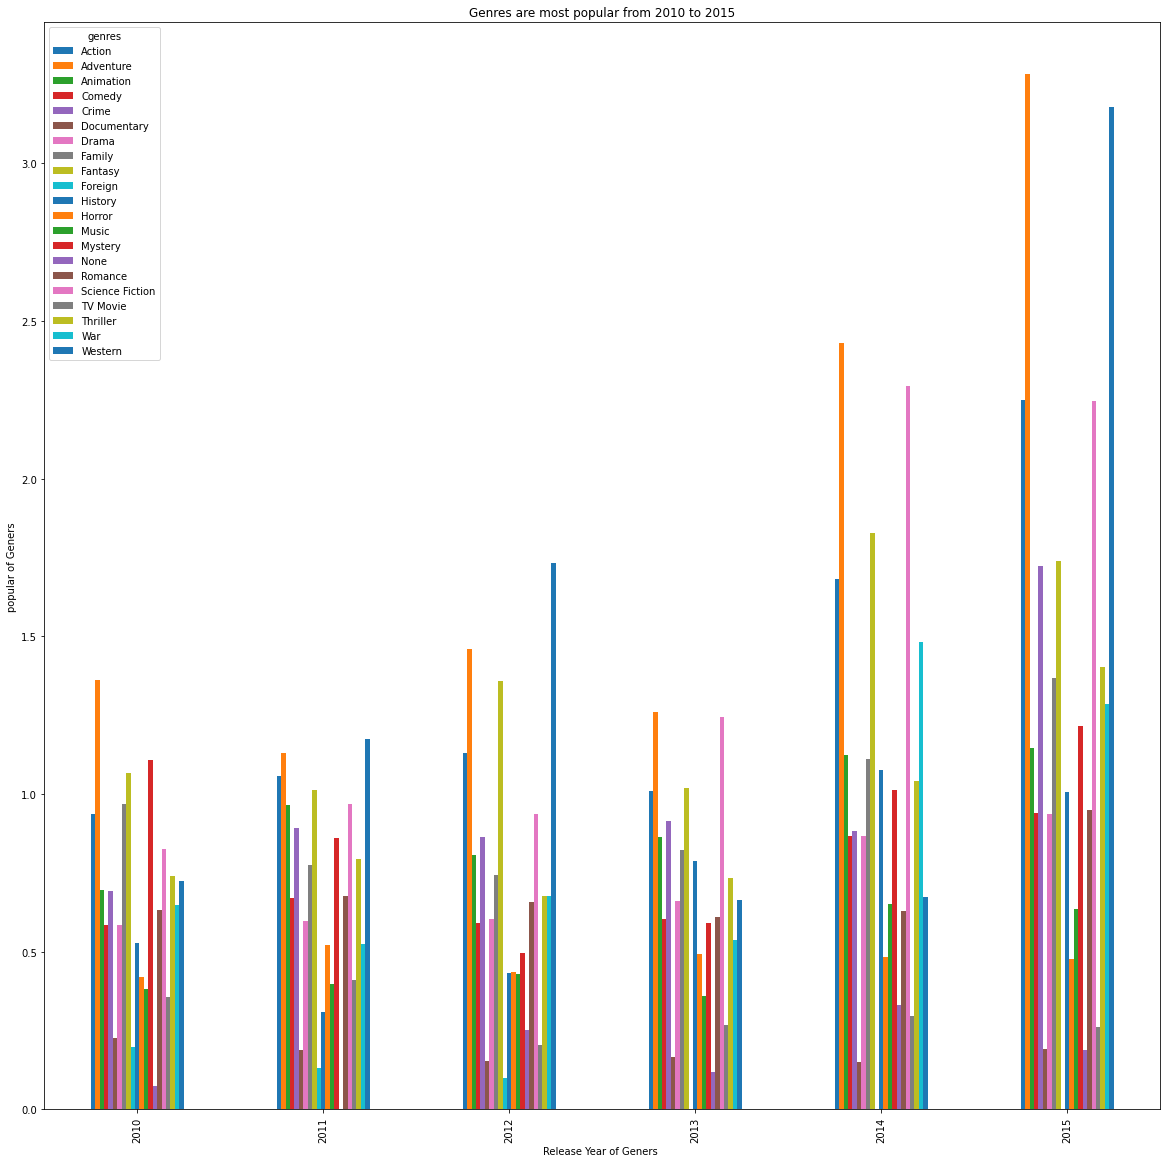

In [26]:
fig, ax= plt.subplots(figsize=(20,20))
new_genes[new_genes['release_year']>2009].groupby(['release_year','genres']).mean()['popularity'].unstack().plot.bar(ax=ax)
ax.title.set_text('Genres are most popular from 2010 to 2015')
ax.set_xlabel('Release Year of Geners ')
ax.set_ylabel('popular of Geners')


<a id='quest2'></a>
###   What kinds of properties are associated with movies that have high revenues?

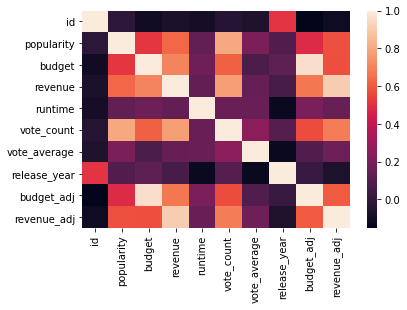

In [27]:
ax = sns.heatmap(df.corr())

In [28]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.corr()['revenue_adj'].sort_values()

id             -0.107513
release_year   -0.064884
runtime         0.154510
vote_average    0.173239
budget          0.573553
popularity      0.578162
budget_adj      0.602133
vote_count      0.685955
revenue         0.909826
revenue_adj     1.000000
Name: revenue_adj, dtype: float64

Text(0.5, 1.0, 'Relation between Revenue and Budget')

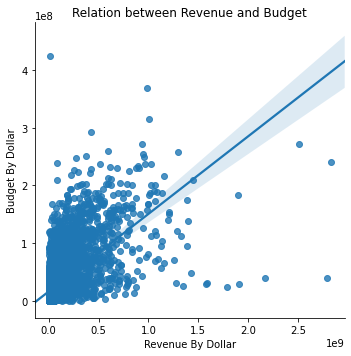

In [29]:
g=sns.lmplot(data=df, x = 'revenue_adj', y = 'budget_adj', legend_out = True)
g.set_xlabels('Revenue By Dollar')
g.set_ylabels('Budget By Dollar')
ax = plt.gca()
ax.set_title("Relation between Revenue and Budget")
#sns.plt.show()


Text(0.5, 1.0, 'Relation between Revenue and Vote Count')

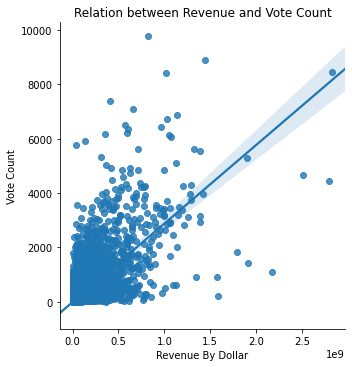

In [30]:

g=sns.lmplot(data=df, x = 'revenue_adj', y = 'vote_count')
g.set_titles('Relation between Revenue and Vote Count')
g.set_xlabels('Revenue By Dollar')
g.set_ylabels('Vote Count')
ax = plt.gca()
ax.set_title("Relation between Revenue and Vote Count")

Text(0.5, 1.0, 'Relation between Revenue and popularity')

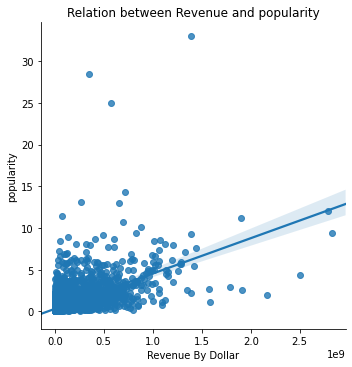

In [31]:

g=sns.lmplot(data=df, x = 'revenue_adj', y = 'popularity')
g.set_titles('Relation between Revenue and  popularity')
g.set_xlabels('Revenue By Dollar')
g.set_ylabels('popularity')
ax = plt.gca()
ax.set_title("Relation between Revenue and popularity")

Text(0.5, 1.0, 'Relation between Revenue and vote average')

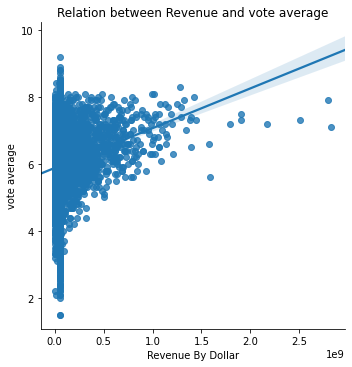

In [32]:


g=sns.lmplot(data=df, x = 'revenue_adj', y = 'vote_average')
g.set_titles('Relation between Revenue and  vote average')
g.set_xlabels('Revenue By Dollar')
g.set_ylabels('vote average')
ax = plt.gca()
ax.set_title("Relation between Revenue and vote average")

Text(0.5, 1.0, 'Relation between Revenue and runtime')

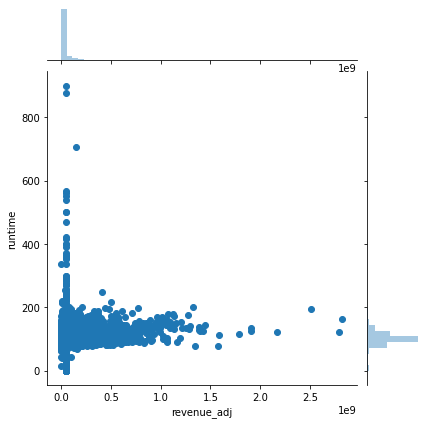

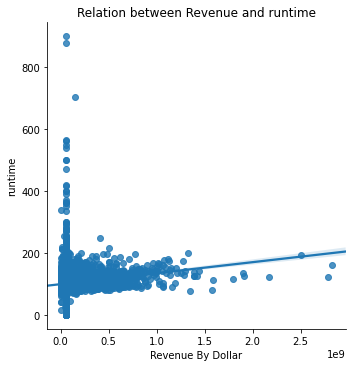

In [33]:
sns.jointplot(data=df, x = 'revenue_adj', y = 'runtime')
g=sns.lmplot(data=df, x = 'revenue_adj', y = 'runtime')
g.set_titles('Relation between Revenue and  runtime')
g.set_xlabels('Revenue By Dollar')
g.set_ylabels('runtime')
ax = plt.gca()
ax.set_title("Relation between Revenue and runtime")

<a id='conclusions'></a>
## Conclusions

#### Which genres are most popular from year to year?
Action, Adventure and Animation popular increas from year to year
### What kinds of properties are associated with movies that have high revenues?
vote_count, budget and popularity are properties are associated with movies that have high revenue

### Limitaion
zero value in revenue or budget 
Removing the zero value resolves an error
The use of a method does not affect the dependency of the data
## Resource
https://gist.github.com/jlln/338b4b0b55bd6984f883
<br />https://pythonbasics.org/seaborn-line-plot/
<br />https://seaborn.pydata.org/generated/seaborn.heatmap.html
<br />https://pandas.pydata.org/
<br />https://numpy.org/

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0